In [1]:
import numpy as np
import h5py, os
import matplotlib.pyplot as plt

from info_measures import dataset_generators as dg

from ecog.signal_processing import resample
from scipy.io import loadmat
from scipy.signal import stft, welch

/home/jesse/anaconda3/envs/info/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Setup

In [2]:
d = loadmat('cfs.4_1200.54Wvl.mat')
cfs = np.squeeze(d['cfs'])
HG_mask = np.squeeze(np.logical_and(cfs <= 150., cfs >= 70.))

In [3]:
def extract_baseline(X, mark):
    start = 100
    mark = abs(mark)
    mark = mark / mark.max()
    end = np.argmax(mark > .5) - 100
    assert end > start
    return X[start:end]

def cut_data(X, mark):
    mark = abs(mark)
    mark = mark / mark.max()
    start = np.argmax(mark > .5)
    end = np.argmax(mark[::-1] > .5)
    return X[start:-end]

# Convert

In [4]:
files, _ = os.walk('/data/NWB/R32/')
folder = files[0]
files = files[2]
files = [f for f in files if 'wRaw' not in f]
#files = ['R32_B6.nwb']

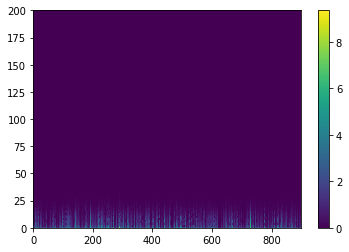

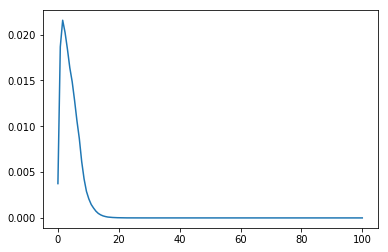

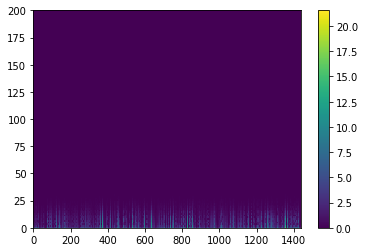

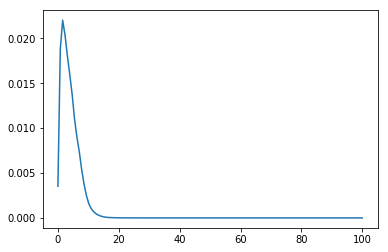

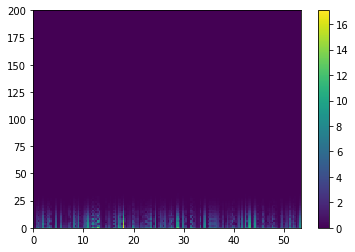

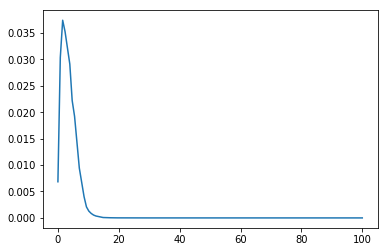

In [7]:
for fname in files:
    with h5py.File(os.path.join(folder, fname)) as f:
        X = np.squeeze(f['processing/preprocessed/Wvlt_4to1200_54band_CAR1/Wvlt_ECoG128/data'].value)
        st = f['processing/preprocessed/MUA/MUA_ECoG128/starting_time']
        rm = np.squeeze(f['stimulus/presentation/recorded_mark/data'].value)
        init_rate = st.attrs['rate']
    HG = X[:, :, HG_mask].mean(axis=-1)
    baseline = extract_baseline(HG, rm)
    HG = HG / np.median(baseline, axis=0, keepdims=True)
    HG = cut_data(HG, rm)
    HG_ds = resample(HG, 50., init_rate, axis=0)
    save_name = fname.split('.')[0] + '.h5'
    with h5py.File(os.path.join('/data/NWB/R32/simple/{}'.format(save_name)), 'w') as f:
        f.create_dataset('X', data=HG_ds[np.newaxis,:,:,np.newaxis])
    plt.figure()
    f, t, z = stft(HG[:,6], init_rate)
    im = plt.pcolormesh(t, f, abs(z))
    plt.colorbar(im)
    plt.figure()
    f, z = welch(HG[:, 0], 200.)
    plt.plot(f, abs(z))
plt.show()

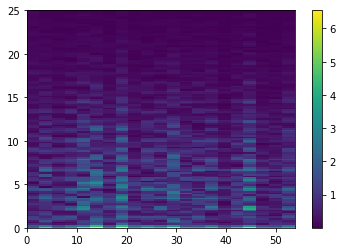

In [12]:
f, t, z = stft(HG[:,6], 50)
im = plt.pcolormesh(t, f, abs(z))
plt.colorbar(im)
plt.show()

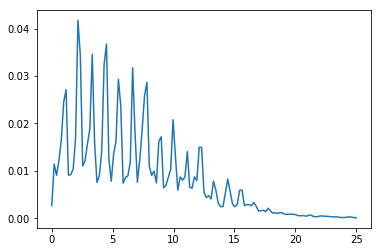

In [13]:
f, z = welch(HG[:, 0], 50.)
plt.plot(f, abs(z))
plt.show()

In [124]:
HG.shape

(25877, 128)

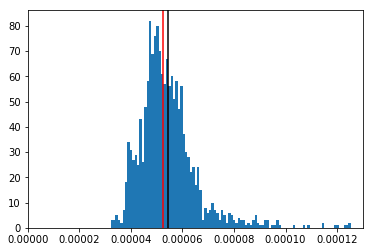

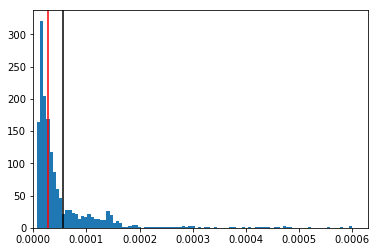

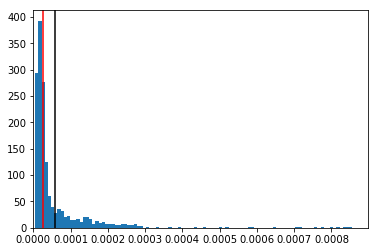

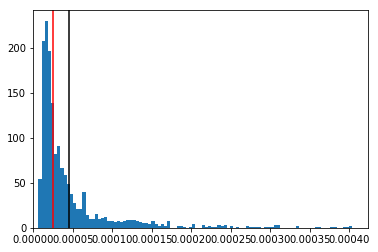

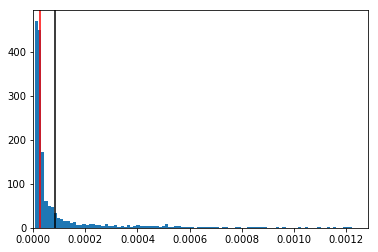

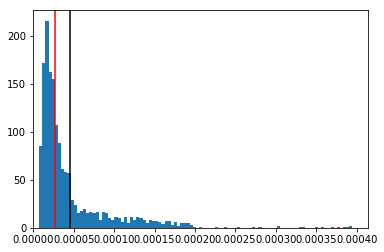

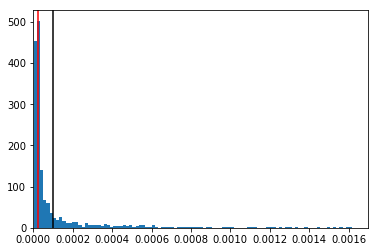

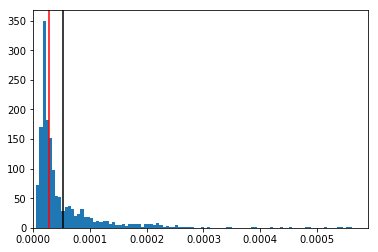

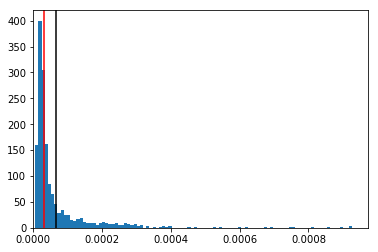

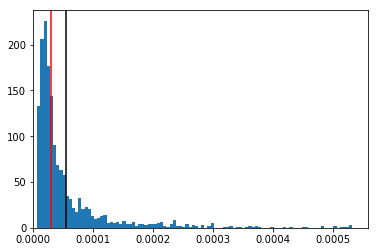

In [121]:
for x in baseline.T[:10]:
    plt.figure()
    plt.hist(x, bins=100)
    plt.axvline(x.mean(), 0, 1, c='k')
    plt.axvline(np.median(x), 0, 1, c='r')
    plt.xlim(0, None)
plt.show()

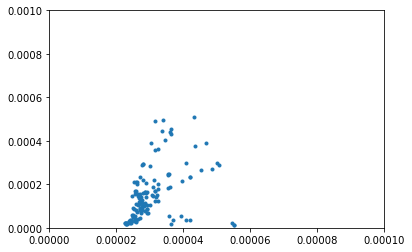

In [113]:
plt.scatter(np.median(HG, axis=0), HG.std(axis=0), marker='.')
plt.xlim(0, .0001)
plt.ylim(0, .001)
plt.show()

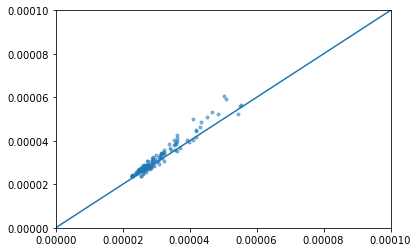

In [117]:
plt.scatter(np.median(HG, axis=0), np.median(baseline, axis=0), marker='.', alpha=.5)
plt.xlim(0, .0001)
plt.ylim(0, .0001)
plt.plot([0, 1], [0, 1])
plt.show()

In [54]:
plt.close()

In [4]:
X = resample(X, 200., init_rate, axis=0)

In [6]:
mark_std = rm.std()
print(mark_std)

0.0048479


In [18]:
init_rate

400.0

In [11]:
X.shape

(25877, 128, 54)

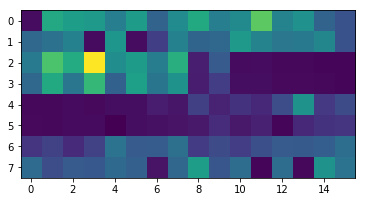

In [17]:
plt.imshow(X.mean(axis=(0, 2)).reshape(8, 16))
plt.show()

In [ ]:
plt.plot(X[:, 0, 0])
plt.show()

In [12]:
16*8

128

In [7]:
rm_ds = np.squeeze(resample(rm[np.newaxis], 200., 400.))
print(rm.shape, rm_ds.shape)

(25877,) (12939,)


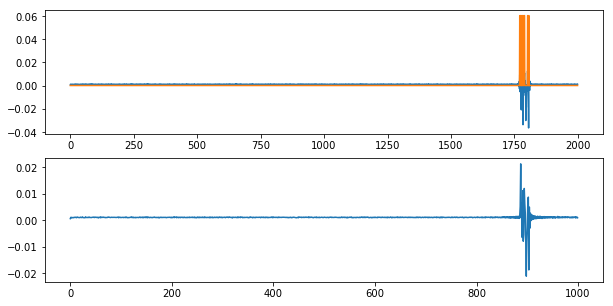

In [9]:
n_pts = 2000
f, (ax0, ax1) = plt.subplots(2, figsize=(10, 5))
ax0.plot(rm[:n_pts])
thresh = rm > mark_std
ax0.plot(thresh[:n_pts] * rm.max())
ax1.plot(rm_ds[:n_pts // 2])
plt.show()

In [36]:
x.shape

(25877, 128, 54)

In [2]:
resample?

In [13]:
x = f['processing/preprocessed/Wvlt_4to1200_54band_CAR1/Wvlt_ECoG128/data']
st = f['processing/preprocessed/MUA/MUA_ECoG128/starting_time']

In [5]:
x.shape

(585267, 128, 54)

In [14]:
list(st.attrs)

['rate', 'unit']

In [15]:
st.attrs['rate']

400.0

In [18]:
st.attrs['unit']

'Seconds'

In [31]:
f.visit(lambda name: print(name))

acquisition
acquisition/Raw
acquisition/Raw/ECoG128
acquisition/Raw/ECoG128/ECoG128
acquisition/Raw/ECoG128/data
acquisition/Raw/ECoG128/starting_time
acquisition/Raw/Poly32
acquisition/Raw/Poly32/Poly32
acquisition/Raw/Poly32/data
acquisition/Raw/Poly32/starting_time
analysis
epochs
epochs/epochs
epochs/timeseries_index
file_create_date
general
general/devices
general/devices/ECoG128
general/devices/Poly32
general/experiment_description
general/experimenter
general/extracellular_ephys
general/extracellular_ephys/ECoG128_electrodes
general/extracellular_ephys/Poly32
general/extracellular_ephys/electrodes
general/institution
general/lab
general/notes
general/pharmacology
general/session_id
general/surgery
identifier
processing
processing/preprocessed
processing/preprocessed/MUA
processing/preprocessed/MUA/MUA_ECoG128
processing/preprocessed/MUA/MUA_ECoG128/data
processing/preprocessed/MUA/MUA_ECoG128/starting_time
processing/preprocessed/MUA/MUA_Poly32
processing/preprocessed/MUA/MUA_Po